# **df1 - Preprocessing**

# **Insurance Risk & Claims Dataset**

In [ ]:
########################################################################

# **1) Missing Values**

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/df1-synthetic_insurance_dataset_fixed.csv')

In [ ]:
df1.isnull().sum()

Policy_ID                   0
Customer_Age                0
Gender                      0
Policy_Type                 0
Annual_Income               0
Vehicle_Age_Property_Age    0
Claim_History               0
Premium_Amount              0
Claim_Amount                0
Risk_Score                  0
Fraudulent_Claim            0
dtype: int64

# **No Missing Values Found**

# **If Missing Values have this Datasets.**

# **Step 1:**

check % of Missing Values if more than 70% Missing Values -> Delete that Columns

# **Step 2:**

Check this Columns have Normal Distribution and No Outliers - Use Mean Imputation

Else use Median Imputation

# **Step 3:**

Check that Columns Have Categorical Columns Use Mode

# **Step 4:**

If That Dataset have Times series Use Forward fill or Backward Fill

#**Step 5:**

If that Missing Values was Voluntarily Happen Based On Confidential else any other Situation

Client or SME or BA Give us Custom values fill us Cutom method to fill Missing Values

In [ ]:
########################################################################

# **2) Outliers**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

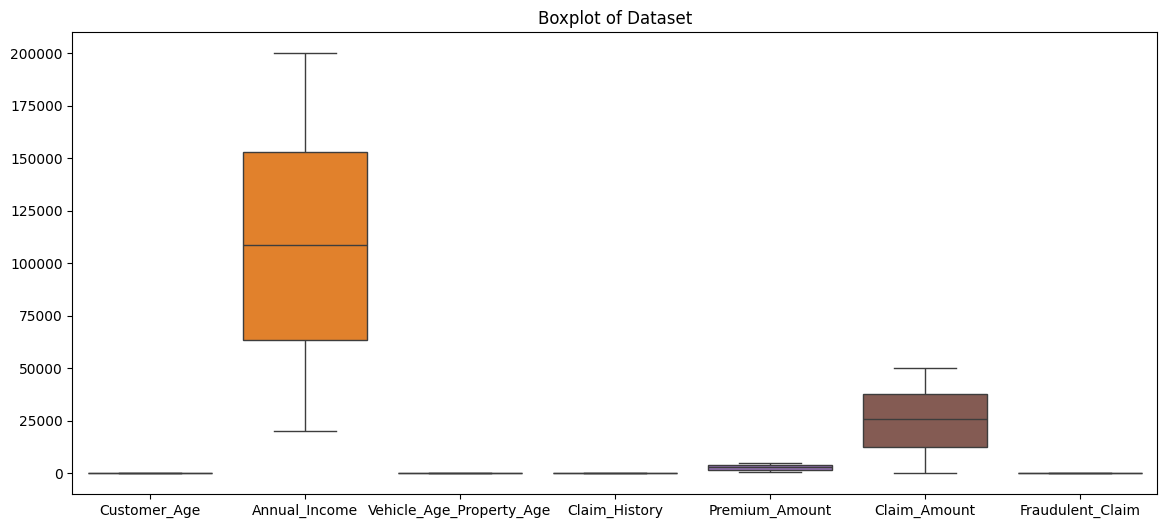

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df1)
plt.title("Boxplot of Dataset")
plt.show()


In [ ]:
import pandas as pd

# Detect outliers using IQR for all numeric columns
outliers = {}

for col in df1.select_dtypes(include=['number']).columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col].tolist()

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers in {col}: {out}")


Outliers in Customer_Age: []
Outliers in Annual_Income: []
Outliers in Vehicle_Age_Property_Age: []
Outliers in Claim_History: []
Outliers in Premium_Amount: []
Outliers in Claim_Amount: []
Outliers in Fraudulent_Claim: []


# **No Outlier Found in this Datasets**

# **If Outlier Found in this Datasets:-**

# **Step 1: Understand the Outliers**



**Check Data Entry Errors:** Typos or incorrect values? Fix them if possible.

**Assess Context:** Are these extreme values realistic or expected in your data domain?

#**Step 2: Choose an Outlier Treatment Approach:**



#**1) Removal Methods:**

**Delete Outliers:** If they’re definitely errors or irrelevant.

df_clean = df1[~((df1['A'] < lower_bound) | (df1['A'] > upper_bound))]


#**2) Imputation Methods:**

**Replace with Mean/Median:** Works well when outliers aren’t extreme.

median = df1['A'].median()
df1['A'] = np.where((df1['A'] < lower_bound) | (df1['A'] > upper_bound), median, df1['A'])

**Use Mode:** For categorical data with outliers


#**3) Transformation Methods:**

**Log Transformation:** Reduces effect of right-skewed outliers.

df1['A_log'] = np.log1p(df1['A'])

**Square Root or Box-Cox:** For data with different types of skew.


#**4) Capping or Clipping**

**Winsorization:** Limit extreme values to percentiles.

from scipy.stats.mstats import winsorize
df1['A_winsorized'] = winsorize(df1['A'], limits=[0.05, 0.05])  # Caps at 5th & 95th percentile

**Cap at Boundaries:** Replace outliers with IQR bounds.

df1['A'] = np.clip(df1['A'], lower_bound, upper_bound)


In [ ]:
########################################################################

# **3) Encoding**

# **1) One-Hot Encoding for [Policy_Type, Gender].**

# **2) Label Encoding for [Risk_Score] (Low → 0, Medium → 1, High → 2).**

In [ ]:
df1.head()

Policy_ID  Customer_Age Gender Policy_Type  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   Male      Health   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65  Other      Health   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   Male        Auto   
3  972a8469-1641-4f82-8b9d-2434e465e150            35   Male        Auto   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   Male      Health   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0      153479.09                         7              1         1127.92   
1      126288.65                         1              0          921.63   
2      148883.53                        22              4         2387.84   
3      145665.09                        10              2         1199.66   
4       88386.91                        11              2         3216.77   

   Claim_Amount Risk_Score  Fraudulent_Claim  
0       5124.76        Low                 0  
1      11633.04        Low                 0  
2      22460.45     Medium                 0  
3      47860.65     Medium                 1  
4      40356.41       High                 1

In [ ]:
df1.shape

(1000, 11)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:

# OneHotEncoder with updated argument
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded = onehot_encoder.fit_transform(df1[['Policy_Type', 'Gender']])

# Convert back to DataFrame for readability and cast to int
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(['Policy_Type', 'Gender'])).astype(int)

print(encoded_df)


     Policy_Type_Auto  Policy_Type_Health  Policy_Type_Life  \
0                   0                   1                 0   
1                   0                   1                 0   
2                   1                   0                 0   
3                   1                   0                 0   
4                   0                   1                 0   
..                ...                 ...               ...   
995                 0                   1                 0   
996                 0                   0                 0   
997                 1                   0                 0   
998                 1                   0                 0   
999                 0                   1                 0   

     Policy_Type_Property  Gender_Female  Gender_Male  Gender_Other  
0                       0              0            1             0  
1                       0              0            0             1  
2                       0        

In [ ]:
df1.head(1)

Policy_ID  Customer_Age Gender Policy_Type  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   Male      Health   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0      153479.09                         7              1         1127.92   

   Claim_Amount Risk_Score  Fraudulent_Claim  
0       5124.76        Low                 0

# **2) Risk_Score -> Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:


# Define the order of categories from low to high risk
risk_categories = ['Low', 'Medium', 'High']

# Create the OrdinalEncoder with category order
lbl_encoder = OrdinalEncoder(categories=[risk_categories])

# Fit and transform the Risk_Score column
df1['Risk_Score_Encoded'] = lbl_encoder.fit_transform(df1[['Risk_Score']]).astype(int)

print(df1)


                                Policy_ID  Customer_Age  Gender Policy_Type  \
0    bdd640fb-0667-4ad1-9c80-317fa3b1799d            58    Male      Health   
1    23b8c1e9-3924-46de-beb1-3b9046685257            65   Other      Health   
2    bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56    Male        Auto   
3    972a8469-1641-4f82-8b9d-2434e465e150            35    Male        Auto   
4    17fc695a-07a0-4a6e-8822-e8f36c031199            39    Male      Health   
..                                    ...           ...     ...         ...   
995  fe54ee4b-80ff-4173-a3df-ecd70e731dd7            76  Female      Health   
996  ea98fef8-d0d7-4e37-bbf2-025f4a0d2b73            61  Female    Property   
997  93d563ae-51a3-4c26-937b-f79bbb44badc            35  Female        Auto   
998  d18183d1-ac2b-4cfc-85c5-1060991121e7            30    Male        Auto   
999  e0527739-4d40-4f1b-bca5-be2952171bf3            45   Other      Health   

     Annual_Income  Vehicle_Age_Property_Age  Claim

In [ ]:
df1.head()

Policy_ID  Customer_Age Gender Policy_Type  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   Male      Health   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65  Other      Health   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   Male        Auto   
3  972a8469-1641-4f82-8b9d-2434e465e150            35   Male        Auto   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   Male      Health   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0      153479.09                         7              1         1127.92   
1      126288.65                         1              0          921.63   
2      148883.53                        22              4         2387.84   
3      145665.09                        10              2         1199.66   
4       88386.91                        11              2         3216.77   

   Claim_Amount Risk_Score  Fraudulent_Claim  Risk_Score_Encoded  
0       5124.76        Low                 0                   0  
1      11633.04        Low                 0                   0  
2      22460.45     Medium                 0                   1  
3      47860.65     Medium                 1                   1  
4      40356.41       High                 1                   2

In [ ]:
df1_encoded=pd.concat([df1,encoded_df],axis=1)

In [ ]:
df1_encoded.head()

Policy_ID  Customer_Age Gender Policy_Type  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   Male      Health   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65  Other      Health   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   Male        Auto   
3  972a8469-1641-4f82-8b9d-2434e465e150            35   Male        Auto   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   Male      Health   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0      153479.09                         7              1         1127.92   
1      126288.65                         1              0          921.63   
2      148883.53                        22              4         2387.84   
3      145665.09                        10              2         1199.66   
4       88386.91                        11              2         3216.77   

   Claim_Amount Risk_Score  Fraudulent_Claim  Risk_Score_Encoded  \
0       5124.76        Low                 0                   0   
1      11633.04        Low                 0                   0   
2      22460.45     Medium                 0                   1   
3      47860.65     Medium                 1                   1   
4      40356.41       High                 1                   2   

   Policy_Type_Auto  Policy_Type_Health  Policy_Type_Life  \
0                 0                   1                 0   
1                 0                   1                 0   
2                 1                   0                 0   
3                 1                   0                 0   
4                 0                   1                 0   

   Policy_Type_Property  Gender_Female  Gender_Male  Gender_Other  
0                     0              0            1             0  
1                     0              0            0             1  
2                     0              0            1             0  
3                     0              0            1             0  
4                     0              0            1             0

In [ ]:
df1_encoded.drop(columns=['Policy_Type','Gender','Risk_Score'],inplace=True)

In [ ]:
df1_encoded.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58      153479.09   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65      126288.65   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56      148883.53   
3  972a8469-1641-4f82-8b9d-2434e465e150            35      145665.09   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       88386.91   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1         1127.92       5124.76   
1                         1              0          921.63      11633.04   
2                        22              4         2387.84      22460.45   
3                        10              2         1199.66      47860.65   
4                        11              2         3216.77      40356.41   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  
0             0  
1             1  
2             0  
3             0  
4             0

# **Encoded Completed:**

In [ ]:
df1_encoded.nunique()

Policy_ID                   1000
Customer_Age                  63
Annual_Income               1000
Vehicle_Age_Property_Age      31
Claim_History                  6
Premium_Amount              1000
Claim_Amount                 999
Fraudulent_Claim               2
Risk_Score_Encoded             3
Policy_Type_Auto               2
Policy_Type_Health             2
Policy_Type_Life               2
Policy_Type_Property           2
Gender_Female                  2
Gender_Male                    2
Gender_Other                   2
dtype: int64

# **Save Encoded Files**

# **1) One Hot Encoder:**

In [ ]:
import pickle

In [ ]:
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

# **2) Label Encoder**

In [ ]:
with open('lbl_encoder.pkl', 'wb') as file:
    pickle.dump(lbl_encoder, file)

# **in Nominal or One Hot Encoding Means -> 0 is No and 1 is Yes**

In [ ]:
df1_encoded.shape

(1000, 16)

In [ ]:
df1_encoded.to_csv('df1_encoded.csv')

# **4) Feature Scaling**

# **Normalize**

# **Annual_Income, Claim_Amount, Premium_Amount**

# Normalize done by reason of minimizing the value for better model training and reduce time - values ranges ( 0 to 1 )

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# Create MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the columns
df1_encoded[['Annual_Income', 'Premium_Amount', 'Claim_Amount']] = scaler.fit_transform(
    df1_encoded[['Annual_Income', 'Premium_Amount', 'Claim_Amount']]
)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Select only the numerical columns to scale
numerical_columns = ['Annual_Income', 'Premium_Amount', 'Claim_Amount']

# Create and fit the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1_encoded[numerical_columns])  # Fit on training data

# Optional: transform and overwrite scaled values in the dataframe
df1_encoded[numerical_columns] = scaler.transform(df1_encoded[numerical_columns])

# Save the fitted scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler fitted and saved successfully!")


Scaler fitted and saved successfully!


In [ ]:
# Save the fitted scaler to a .pkl file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler model saved as scaler.pkl")

Scaler model saved as scaler.pkl


In [ ]:
df1_encoded.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65       0.590267   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56       0.715891   
3  972a8469-1641-4f82-8b9d-2434e465e150            35       0.697997   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       0.379538   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545      0.102080   
1                         1              0        0.093670      0.232579   
2                        22              4        0.419729      0.449681   
3                        10              2        0.155499      0.958985   
4                        11              2        0.604068      0.808517   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  
0             0  
1             1  
2             0  
3             0  
4             0

In [ ]:
df1_encoded.to_csv('df1_scaled.csv')

# **Save Scaled Data**

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# **Feature Scaling Completed**

# **Feature Selection or Feature Engineering**

# **i) Filter Methods: (Fast, Statistical)**

What it does: Selects features based on their statistical relationship with the target variable — independently of any model.

# **Examples:**

**1) Correlation Coefficient:**

(e.g., Pearson, Spearman) Measures linear or rank-based correlation.

**2) Chi-Square Test:**

For categorical features, checks if feature and target are independent.


**3) Mutual Information:**

Measures how much knowing one variable reduces uncertainty about the other.


**4) ANOVA (Analysis of Variance):**

Tests whether feature means differ across target groups.

**Pros:**

Fast and computationally efficient.

Works well for very high-dimensional datasets.

Model-agnostic — can be used with any ML algorithm.


**Cons:**

Ignores feature interactions.

Can miss features that only work well in combination with others.

**When to use:**

When you have a lot of features and want a quick way to narrow them down.

When you’re doing preliminary analysis and need insights on feature importance.

#**ii) Wrapper Methods: (Slow, Model-Based)**

**What it does:**

Uses the performance of a specific model to evaluate feature subsets — essentially trying different combinations and picking the best.

**Examples:**

**Forward Selection:**

Starts with no features, adds them one by one based on model performance.

**Backward Elimination:**

Starts with all features, removes them one by one.

**Recursive Feature Elimination (RFE):**

Trains a model and removes the least important feature iteratively.

**Pros:**

Takes feature interaction into account.
Often results in higher model performance since it’s directly tied to the target metric.

**Cons:**

Computationally expensive — especially with many features.

Results are model-dependent — changing the model might change the selected features.

**When to use:**

When you have a moderate number of features and computational resources.

When model performance is your top priority.


#**So which one’s the best?**

If you want speed and scalability → **Filter methods**

If you want accuracy and performance → **Wrapper methods**

If you want a balance → **Embedded methods** (like feature importance from tree-based models or Lasso regression)